In [1]:
import sys
sys.path.append('../pyorderedfuzzy')

In [11]:
import numpy as np
import pandas as pd
import ofclassifiers as ofcls
import ofnumber as ofn
import matplotlib.pylab as plt

In [3]:
df = pd.read_csv('../data/2D.csv', skiprows=1, sep=';', names=['X1','X2', 'Class'], decimal=',')
df['X0'] = np.ones(len(df))
df.head()

,X1,X2,Class,X0
0,-0.036819,-0.885263,0,1.0
1,-0.576998,-0.367745,1,1.0
2,0.397497,-0.418429,0,1.0
3,-0.288463,0.801790,1,1.0
4,0.829187,-0.350243,0,1.0


In [4]:
df['FX0']= df['X0'].apply(ofn.OFNumber.init_from_scalar)
df['FX1']= df['X1'].apply(ofn.OFNumber.init_from_scalar)
df['FX2']= df['X2'].apply(ofn.OFNumber.init_from_scalar)

In [5]:
df.head()

,X1,X2,Class,X0,FX0,FX1,FX2
0,-0.036819,-0.885263,0,1.0,"([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], [1. 1. 1....",([-0.03681906 -0.03681906 -0.03681906 -0.03681...,([-0.88526332 -0.88526332 -0.88526332 -0.88526...
1,-0.576998,-0.367745,1,1.0,"([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], [1. 1. 1....",([-0.57699767 -0.57699767 -0.57699767 -0.57699...,([-0.36774517 -0.36774517 -0.36774517 -0.36774...
2,0.397497,-0.418429,0,1.0,"([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], [1. 1. 1....",([0.39749724 0.39749724 0.39749724 0.39749724 ...,([-0.41842878 -0.41842878 -0.41842878 -0.41842...
3,-0.288463,0.801790,1,1.0,"([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], [1. 1. 1....",([-0.28846335 -0.28846335 -0.28846335 -0.28846...,([0.80179048 0.80179048 0.80179048 0.80179048 ...
4,0.829187,-0.350243,0,1.0,"([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], [1. 1. 1....",([0.82918696 0.82918696 0.82918696 0.82918696 ...,([-0.35024341 -0.35024341 -0.35024341 -0.35024...


In [6]:
X = df[['FX0','FX1','FX2']].values
d = df['Class'].values
print(X.shape, d.shape)

(500, 3) (500,)


In [7]:
perceptron = ofcls.OFPercepton()

In [8]:
perceptron.fit(X, d, eta=0.001, epoch=100)

Epoch: 1, Error: 65
Epoch: 2, Error: 59
Epoch: 3, Error: 54
Epoch: 4, Error: 52
Epoch: 5, Error: 46
Epoch: 6, Error: 43
Epoch: 7, Error: 40
Epoch: 8, Error: 35
Epoch: 9, Error: 33
Epoch: 10, Error: 33
Epoch: 11, Error: 30
Epoch: 12, Error: 27
Epoch: 13, Error: 24
Epoch: 14, Error: 23
Epoch: 15, Error: 20
Epoch: 16, Error: 17
Epoch: 17, Error: 16
Epoch: 18, Error: 15
Epoch: 19, Error: 12
Epoch: 20, Error: 12
Epoch: 21, Error: 11
Epoch: 22, Error: 10
Epoch: 23, Error: 10
Epoch: 24, Error: 10
Epoch: 25, Error: 10
Epoch: 26, Error: 9
Epoch: 27, Error: 7
Epoch: 28, Error: 7
Epoch: 29, Error: 7
Epoch: 30, Error: 7
Epoch: 31, Error: 7
Epoch: 32, Error: 6
Epoch: 33, Error: 6
Epoch: 34, Error: 5
Epoch: 35, Error: 4
Epoch: 36, Error: 4
Epoch: 37, Error: 2
Epoch: 38, Error: 1
Epoch: 39, Error: 2
Epoch: 40, Error: 0
After 40 epochs, Error: 0


In [9]:
perceptron.weights.values

array([([0.4521522 0.4521522 0.4521522 0.4521522 0.4521522 0.4521522 0.4521522
 0.4521522 0.4521522 0.4521522 0.4521522], [0.4521522 0.4521522 0.4521522 0.4521522 0.4521522 0.4521522 0.4521522
 0.4521522 0.4521522 0.4521522 0.4521522]),
       ([-1.13402386 -1.13402386 -1.13402386 -1.13402386 -1.13402386 -1.13402386
 -1.13402386 -1.13402386 -1.13402386 -1.13402386 -1.13402386], [-1.13402386 -1.13402386 -1.13402386 -1.13402386 -1.13402386 -1.13402386
 -1.13402386 -1.13402386 -1.13402386 -1.13402386 -1.13402386]),
       ([0.56336211 0.56336211 0.56336211 0.56336211 0.56336211 0.56336211
 0.56336211 0.56336211 0.56336211 0.56336211 0.56336211], [0.56336211 0.56336211 0.56336211 0.56336211 0.56336211 0.56336211
 0.56336211 0.56336211 0.56336211 0.56336211 0.56336211])], dtype=object)

In [37]:
a = -perceptron.weights[1]/perceptron.weights[2]
b = -perceptron.weights[0]/perceptron.weights[2]
a, b

(([2.01295728 2.01295728 2.01295728 2.01295728 2.01295728 2.01295728
  2.01295728 2.01295728 2.01295728 2.01295728 2.01295728], [2.01295728 2.01295728 2.01295728 2.01295728 2.01295728 2.01295728
  2.01295728 2.01295728 2.01295728 2.01295728 2.01295728]),
 ([-0.80259604 -0.80259604 -0.80259604 -0.80259604 -0.80259604 -0.80259604
  -0.80259604 -0.80259604 -0.80259604 -0.80259604 -0.80259604], [-0.80259604 -0.80259604 -0.80259604 -0.80259604 -0.80259604 -0.80259604
  -0.80259604 -0.80259604 -0.80259604 -0.80259604 -0.80259604]))

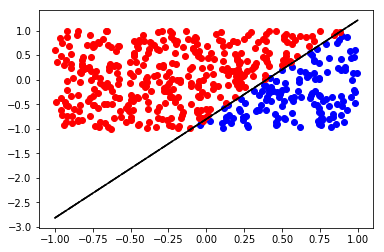

In [38]:
x = df['X1'].values
y = df['X2'].values
d = df['Class'].values

c0 = np.array([[ex, ey] for ex, ey, c in zip(x,y,d) if c==0])
c1 = np.array([[ex, ey] for ex, ey, c in zip(x,y,d) if c==1])

xx = np.linspace(-1,1,1000)
aa = np.array([a for _ in range(1000)])
bb = np.array([b for _ in range(1000)])
line = aa*xx+bb
supp = [l.supp() for l in line]
line_left = [min(e[0][0], e[1][0]) for e in supp]
line_right = [max(e[0][1], e[1][1]) for e in supp]
line_cog = [l.defuzzy() for l in line]

fig, ax = plt.subplots()
ax.scatter(c0[:,0], c0[:,1], c='b')
ax.scatter(c1[:,0], c1[:,1], c='r')
ax.plot(xx, line_left, 'k--')
ax.plot(xx, line_right, 'k-.')
ax.plot(xx, line_cog, 'k-')

plt.show()

In [71]:
c0 = np.random.multivariate_normal(np.array([-0.5, 0.5]), np.array([[0.01, 0],[0,0.01]]), size=300)
c1 = np.random.multivariate_normal(np.array([0.5, -0.5]), np.array([[0.01, 0],[0,0.01]]), size=300)
data = np.concatenate([c0, c1])
d = np.concatenate([np.zeros(300), np.ones(300)])
temp = np.arange(600)
np.random.shuffle(temp)
data = data[temp]
d = d[temp]
ndata = np.ones((600,3))
ndata[:,1:] = data

In [72]:
vfunc = np.vectorize(ofn.OFNumber.init_from_scalar, otypes=[ofn.OFNumber])
fdata = vfunc(ndata)

In [73]:
fdata

array([[([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]),
        ([-0.48216572 -0.48216572 -0.48216572 -0.48216572 -0.48216572 -0.48216572
 -0.48216572 -0.48216572 -0.48216572 -0.48216572 -0.48216572], [-0.48216572 -0.48216572 -0.48216572 -0.48216572 -0.48216572 -0.48216572
 -0.48216572 -0.48216572 -0.48216572 -0.48216572 -0.48216572]),
        ([0.55534929 0.55534929 0.55534929 0.55534929 0.55534929 0.55534929
 0.55534929 0.55534929 0.55534929 0.55534929 0.55534929], [0.55534929 0.55534929 0.55534929 0.55534929 0.55534929 0.55534929
 0.55534929 0.55534929 0.55534929 0.55534929 0.55534929])],
       [([1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]),
        ([0.48705216 0.48705216 0.48705216 0.48705216 0.48705216 0.48705216
 0.48705216 0.48705216 0.48705216 0.48705216 0.48705216], [0.48705216 0.48705216 0.48705216 0.48705216 0.48705216 0.48705216
 0.48705216 0.48705216 0.48705216 0.48705216 0.48705216]),
        ([-0.51911986 -0.51911986

In [78]:
perceptron = ofcls.OFPercepton()
perceptron.fit(fdata, d, eta=0.01, epoch=100)

Epoch: 1, Error: 4.0
Epoch: 2, Error: 0.0
After 2 epochs, Error: 0.0


In [79]:
perceptron.weights.values

array([([-0.25409961 -0.25409961 -0.25409961 -0.25409961 -0.25409961 -0.25409961
 -0.25409961 -0.25409961 -0.25409961 -0.25409961 -0.25409961], [-0.25409961 -0.25409961 -0.25409961 -0.25409961 -0.25409961 -0.25409961
 -0.25409961 -0.25409961 -0.25409961 -0.25409961 -0.25409961]),
       ([0.14021173 0.14021173 0.14021173 0.14021173 0.14021173 0.14021173
 0.14021173 0.14021173 0.14021173 0.14021173 0.14021173], [0.14021173 0.14021173 0.14021173 0.14021173 0.14021173 0.14021173
 0.14021173 0.14021173 0.14021173 0.14021173 0.14021173]),
       ([-0.8206484 -0.8206484 -0.8206484 -0.8206484 -0.8206484 -0.8206484
 -0.8206484 -0.8206484 -0.8206484 -0.8206484 -0.8206484], [-0.8206484 -0.8206484 -0.8206484 -0.8206484 -0.8206484 -0.8206484
 -0.8206484 -0.8206484 -0.8206484 -0.8206484 -0.8206484])], dtype=object)

In [80]:
a = -perceptron.weights[1]/perceptron.weights[2]
b = -perceptron.weights[0]/perceptron.weights[2]
a, b

(([0.17085482 0.17085482 0.17085482 0.17085482 0.17085482 0.17085482
  0.17085482 0.17085482 0.17085482 0.17085482 0.17085482], [0.17085482 0.17085482 0.17085482 0.17085482 0.17085482 0.17085482
  0.17085482 0.17085482 0.17085482 0.17085482 0.17085482]),
 ([-0.30963273 -0.30963273 -0.30963273 -0.30963273 -0.30963273 -0.30963273
  -0.30963273 -0.30963273 -0.30963273 -0.30963273 -0.30963273], [-0.30963273 -0.30963273 -0.30963273 -0.30963273 -0.30963273 -0.30963273
  -0.30963273 -0.30963273 -0.30963273 -0.30963273 -0.30963273]))

<IPython.core.display.Javascript object>


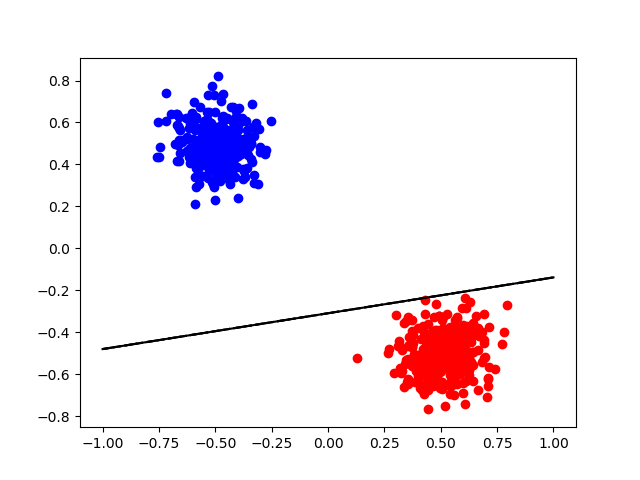

In [81]:
%matplotlib notebook
xx = np.linspace(-1,1,1000)
aa = np.array([a for _ in range(1000)])
bb = np.array([b for _ in range(1000)])
line = aa*xx+bb
supp = [l.supp() for l in line]
line_left = [min(e[0][0], e[1][0]) for e in supp]
line_right = [max(e[0][1], e[1][1]) for e in supp]
line_cog = [l.defuzzy() for l in line]

fig, ax = plt.subplots()
ax.scatter(c0[:,0], c0[:,1], c='b')
ax.scatter(c1[:,0], c1[:,1], c='r')
ax.plot(xx, line_left, 'k--')
ax.plot(xx, line_right, 'k-.')
ax.plot(xx, line_cog, 'k-')

plt.show()